In [1]:
# Benchmarking PBMC dataset with simulated CNVs
# - CD14 monocytes: Chr6 loss, Chr22 loss
# - CD4 T cells: ChrX gain

adfile_path = "/Users/pythonpete/Downloads/CSCB-2025-Final/iPSC_annotated_unnormalized.h5ad"

In [2]:
from cscb_methods import *

In [3]:
# Read file
adata = sc.read_h5ad(adfile_path)

In [4]:
#adata.var["start"] = np.NAN
#adata.var["end"] = np.NAN
#adata.var["chromosome"] = np.NAN
adata.var.columns = ["gene_ids"] + list(adata.var.columns[1:])
adata.var

,gene_ids,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
MIR1302-2HG,ENSG00000243485,False,False,4,0.000342,99.965824,4
FAM138A,ENSG00000237613,False,False,0,0.000000,100.000000,0
OR4F5,ENSG00000186092,False,False,0,0.000000,100.000000,0
AL627309.1,ENSG00000238009,False,False,19,0.001709,99.837662,20
AL627309.3,ENSG00000239945,False,False,0,0.000000,100.000000,0
...,...,...,...,...,...,...,...
AC233755.2,ENSG00000277856,False,False,0,0.000000,100.000000,0
AC233755.1,ENSG00000275063,False,False,0,0.000000,100.000000,0
AC240274.1,ENSG00000271254,False,False,73,0.006835,99.376282,80
AC213203.4,ENSG00000277475,False,False,0,0.000000,100.000000,0


In [5]:
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,n_genes,n_counts,leiden,celltype
barcode,,,,,,,,,,
AACACACAGAACGTCCAAACCAATCCG,2388,5707,630,11.039075,908,15.910286,2388,5707,0,iPSC
AACACACAGAACGTCCAACTTCAGTCT,2451,5962,482,8.084535,905,15.179470,2451,5962,0,iPSC
AACACACAGAACGTCCAAGTACGGACT,2203,5180,489,9.440154,805,15.540541,2203,5180,0,iPSC
AACACACAGAATCCGGTGACGTGTGTT,712,982,2,0.203666,122,12.423625,712,982,1,HSPC
AACACACAGAATCCGGTGCCAATACAG,1582,2992,9,0.300802,526,17.580214,1582,2992,1,HSPC
...,...,...,...,...,...,...,...,...,...,...
TGTGGACACTTACACGACTGACAGCTA,2529,5737,554,9.656615,782,13.630818,2529,5737,0,iPSC
TGTGGACACTTGCCGTCACCAAGGATG,2116,4523,603,13.331859,501,11.076719,2116,4523,0,iPSC
TGTGGACACTTGCCGTCATGCTATCGC,2525,6091,630,10.343129,766,12.575932,2525,6091,0,iPSC


In [6]:
ref = "/Users/pythonpete/Downloads/PBMC_simulated_cnas_041025.h5ad"
ref_ad = sc.read_h5ad(ref)
ref_ad

AnnData object with n_obs × n_vars = 10309 × 20104
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'n_counts', 'cell_type', 'simulated_cnvs'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'chromosome', 'start', 'end', 'strand'
    layers: 'counts'

In [7]:
merge_gene_positions(adata, ref_ad)
adata.var

,gene_ids,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,chromosome,start,end,strand
0,ENSG00000243485,False,False,4,0.000342,99.965824,4,NaN,NaN,NaN,NaN
1,ENSG00000237613,False,False,0,0.000000,100.000000,0,NaN,NaN,NaN,NaN
2,ENSG00000186092,False,False,0,0.000000,100.000000,0,NaN,NaN,NaN,NaN
3,ENSG00000238009,False,False,19,0.001709,99.837662,20,NaN,NaN,NaN,NaN
4,ENSG00000239945,False,False,0,0.000000,100.000000,0,1,89551.0,91105.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
37488,ENSG00000277856,False,False,0,0.000000,100.000000,0,NaN,NaN,NaN,NaN
37489,ENSG00000275063,False,False,0,0.000000,100.000000,0,NaN,NaN,NaN,NaN
37490,ENSG00000271254,False,False,73,0.006835,99.376282,80,HG1343_HG173_HG459_PATCH,1011165.0,1078120.0,1.0
37491,ENSG00000277475,False,False,0,0.000000,100.000000,0,NaN,NaN,NaN,NaN


In [8]:
# Ensure that chromosomes are of the form 'chr#' and exclude any other chromosomes
adata = standardize_chromosomes(adata)

In [9]:
# Run if needed:
adata = qc(adata)
# adata = downsample(adata,n_cells=2000)

In [10]:
# Normalize, do not log transform before CopyKAT GMM clustering
adata.layers['counts'] = adata.X.copy()
sc.pp.normalize_total(adata, target_sum=1e4)

In [11]:
# CopyKAT GMM clustering for automatic detection of diploid reference/normal cells vs aneuploid cells
diploid_pred,labels=identify_diploid_cells_high_precision(adata,window=10,n_components=3,primary_trim_percentile=100,secondary_trim_percentile=10)

adata.obs['predicted_diploid'] = diploid_pred
adata.obs['gmm_cluster'] = labels.astype(str)

In [12]:
# Log transform, find HVGs for UMAP plots
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.125, max_mean=6, min_disp=0.25)

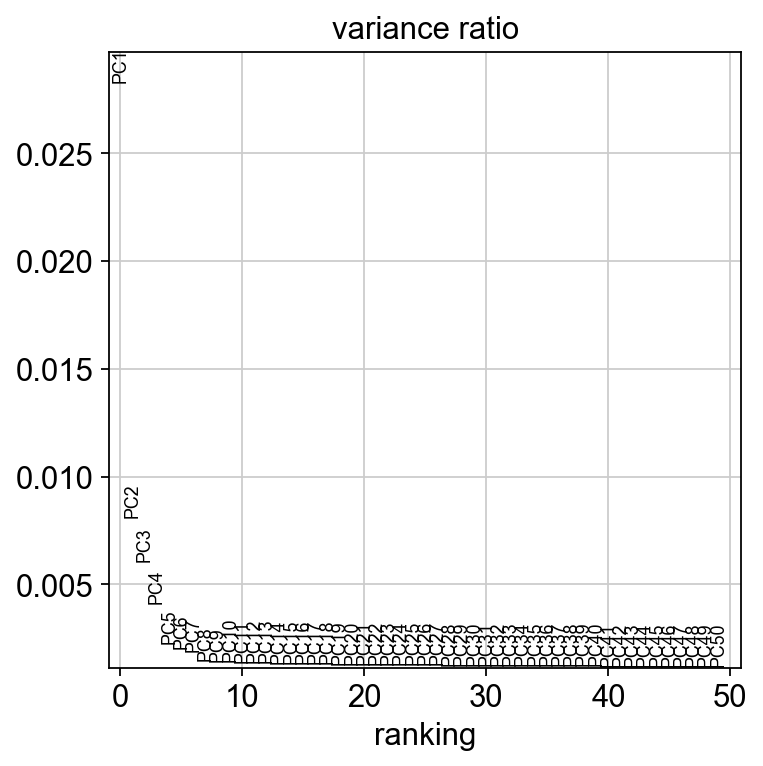

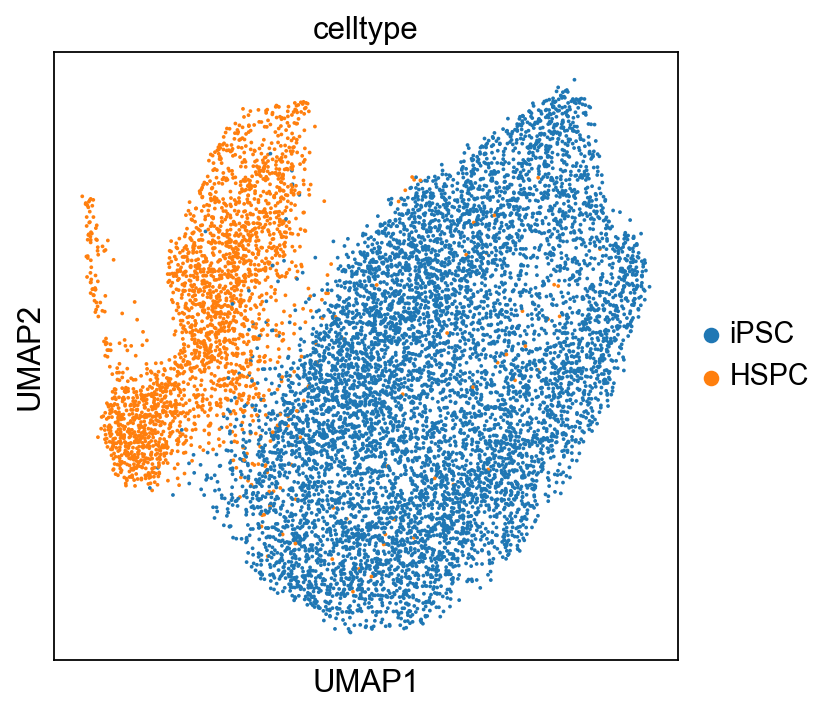

In [13]:
# PCA and KNN for UMAP plots
sc.tl.pca(adata, use_highly_variable=True)
sc.pl.pca_variance_ratio(adata,50)

sc.pp.neighbors(adata,n_neighbors=20,n_pcs=10)
sc.tl.umap(adata)
sc.pl.umap(adata, color='celltype')

In [14]:
# Quick run of InferCNVpy for Leiden clustering by CNV score
reference_key = 'predicted_diploid'
reference_cat = ['diploid']

cnv.tl.infercnv(adata,reference_key=reference_key,reference_cat=reference_cat,
                exclude_chromosomes=None,chunksize=5000,calculate_gene_values=False,
                window_size=100,step=10,dynamic_threshold=1.5)

  0%|          | 0/3 [00:00<?, ?it/s]

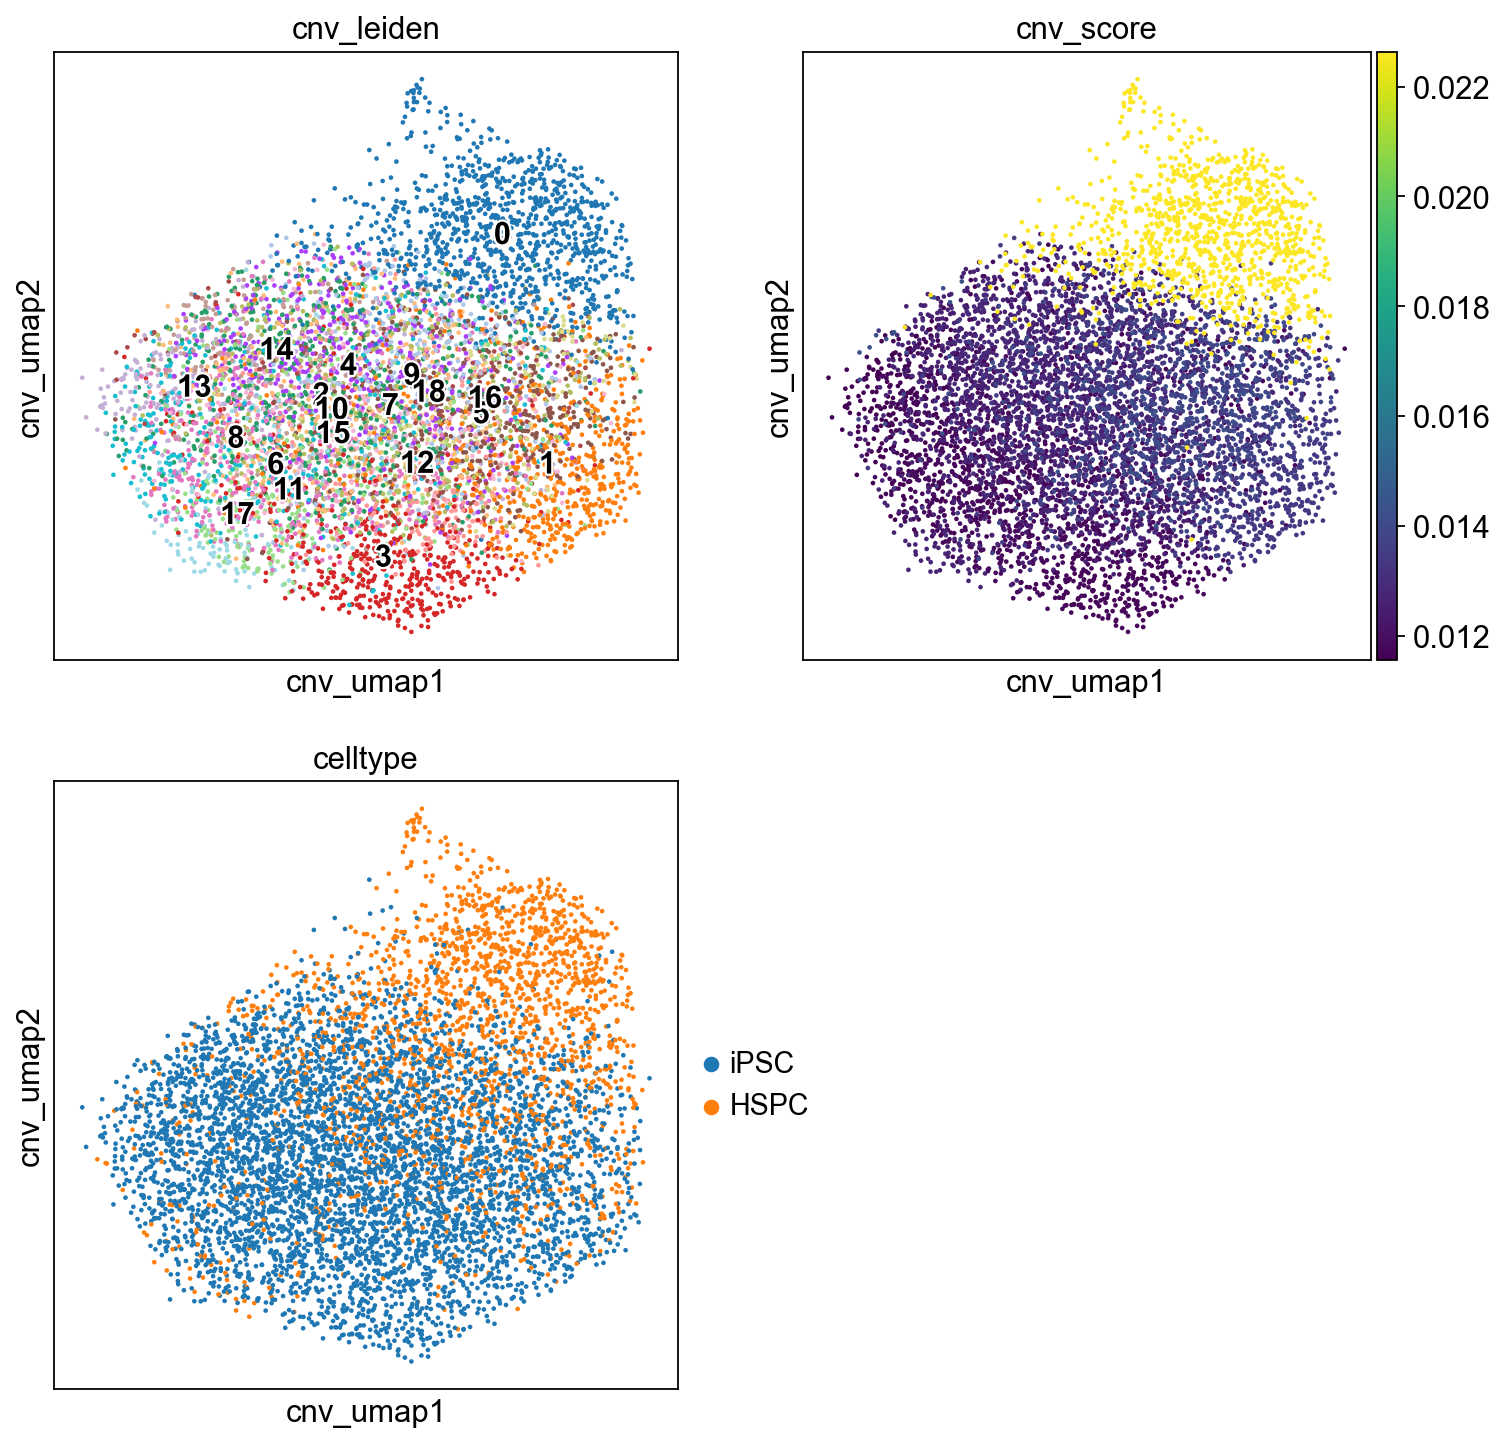

In [15]:
# Plot
plot_aneuploid_cnv_clusters(adata,diploid_annotation='predicted_diploid')

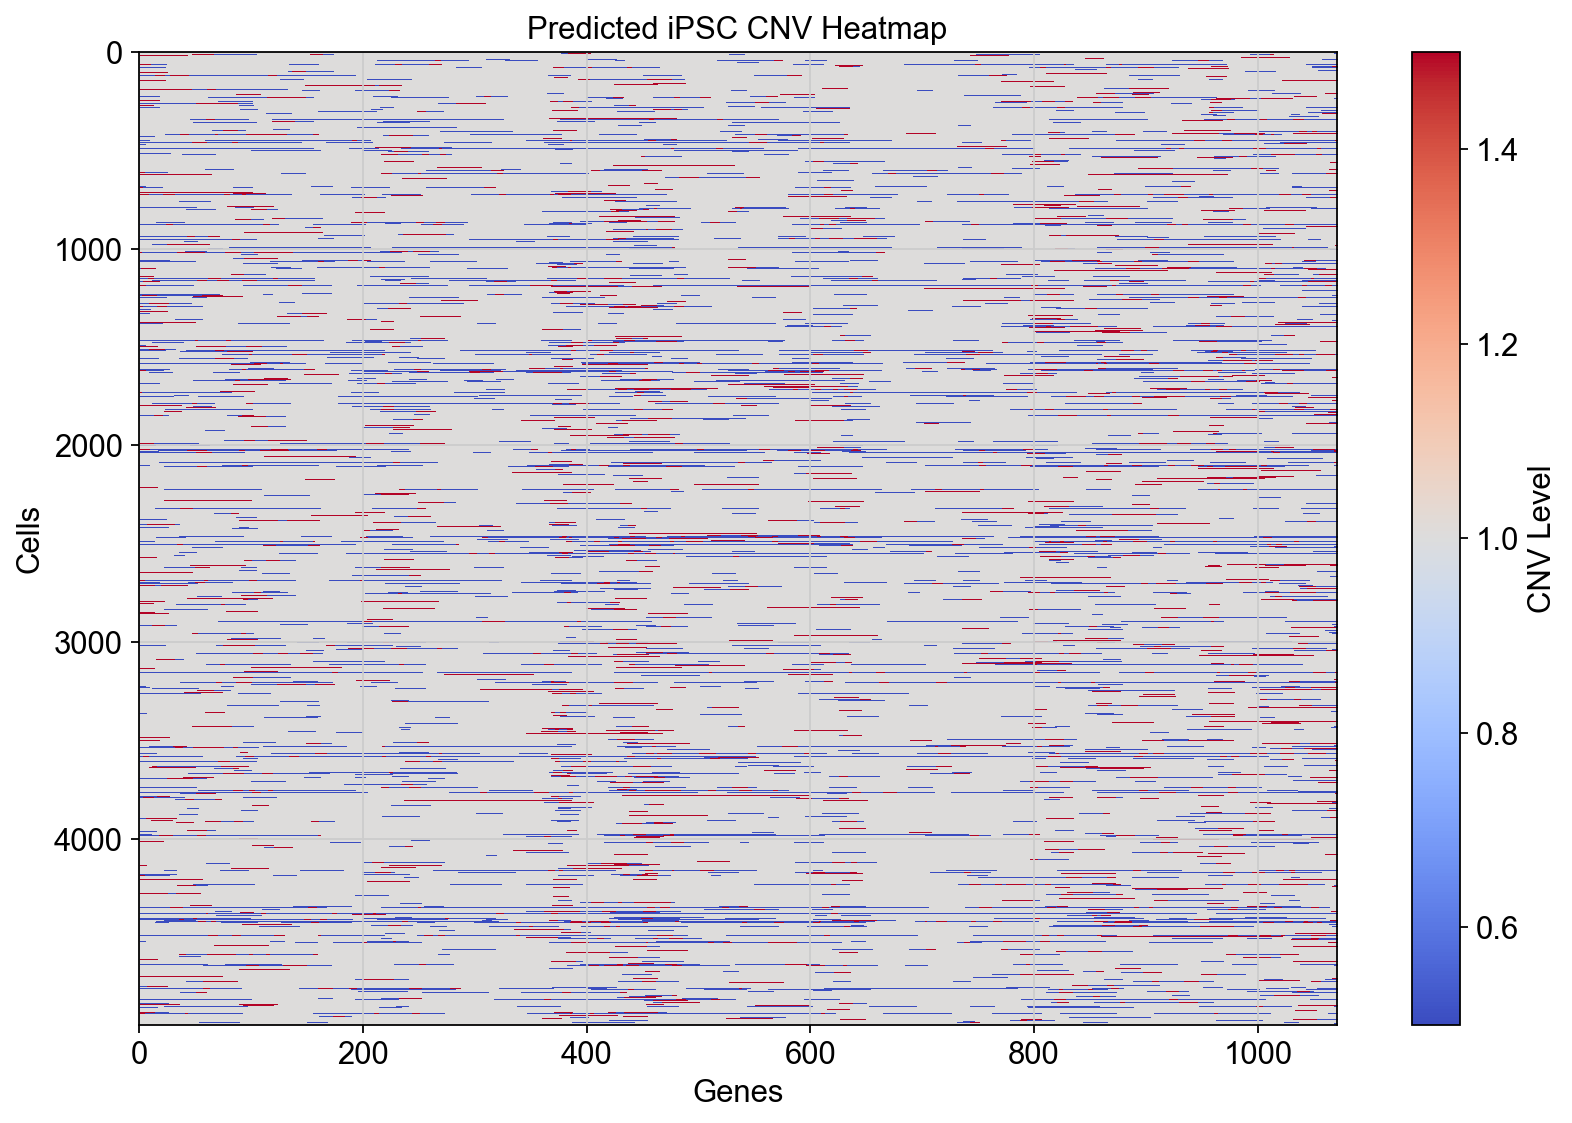

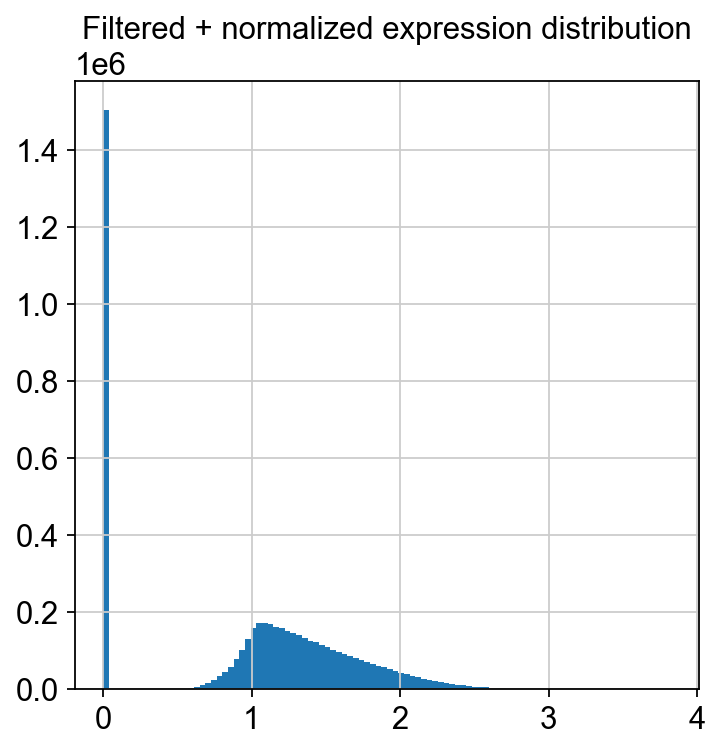

In [16]:
adata_ipsc = i3_hmm_infercnv(adata,cell_type='iPSC',cell_annotation='celltype',diploid_annotation='predicted_diploid',logFC_threshold=0.5,plots=True)

In [17]:
adata_ipsc.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,n_genes,n_counts,leiden,celltype,predicted_diploid,gmm_cluster,hmm_cnv_score,hmm_cnv
barcode,,,,,,,,,,,,,,
AACACACAGAACGTCCAAACCAATCCG,2180,3938,0,0.0,908,15.910286,2180,3938,0,iPSC,aneuploid,2,1.000000,
AACACACAGAACGTCCAACTTCAGTCT,2241,4310,0,0.0,905,15.179470,2241,4310,0,iPSC,aneuploid,2,1.003268,
AACACACAGAACGTCCAAGTACGGACT,2009,3674,0,0.0,805,15.540541,2009,3674,0,iPSC,aneuploid,2,1.001401,
AACACACAGAATCCGGTGTTGTGTACG,2605,5368,0,0.0,1152,15.366146,2605,5368,0,iPSC,aneuploid,2,1.021475,
AACACACAGACCTCGACTCTACTATGG,2411,4679,0,0.0,845,13.294525,2411,4679,0,iPSC,aneuploid,2,1.000000,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGTGGACACTGGTCAGTTCTCAATCGT,2251,4303,0,0.0,995,15.644654,2251,4303,0,iPSC,aneuploid,2,1.000000,
TGTGGACACTTGCCGTCACCAAGGATG,1920,3219,0,0.0,501,11.076719,1920,3219,0,iPSC,aneuploid,2,0.958917,
TGTGGACACTTGCCGTCATGCTATCGC,2313,4440,0,0.0,766,12.575932,2313,4440,0,iPSC,aneuploid,2,1.000000,


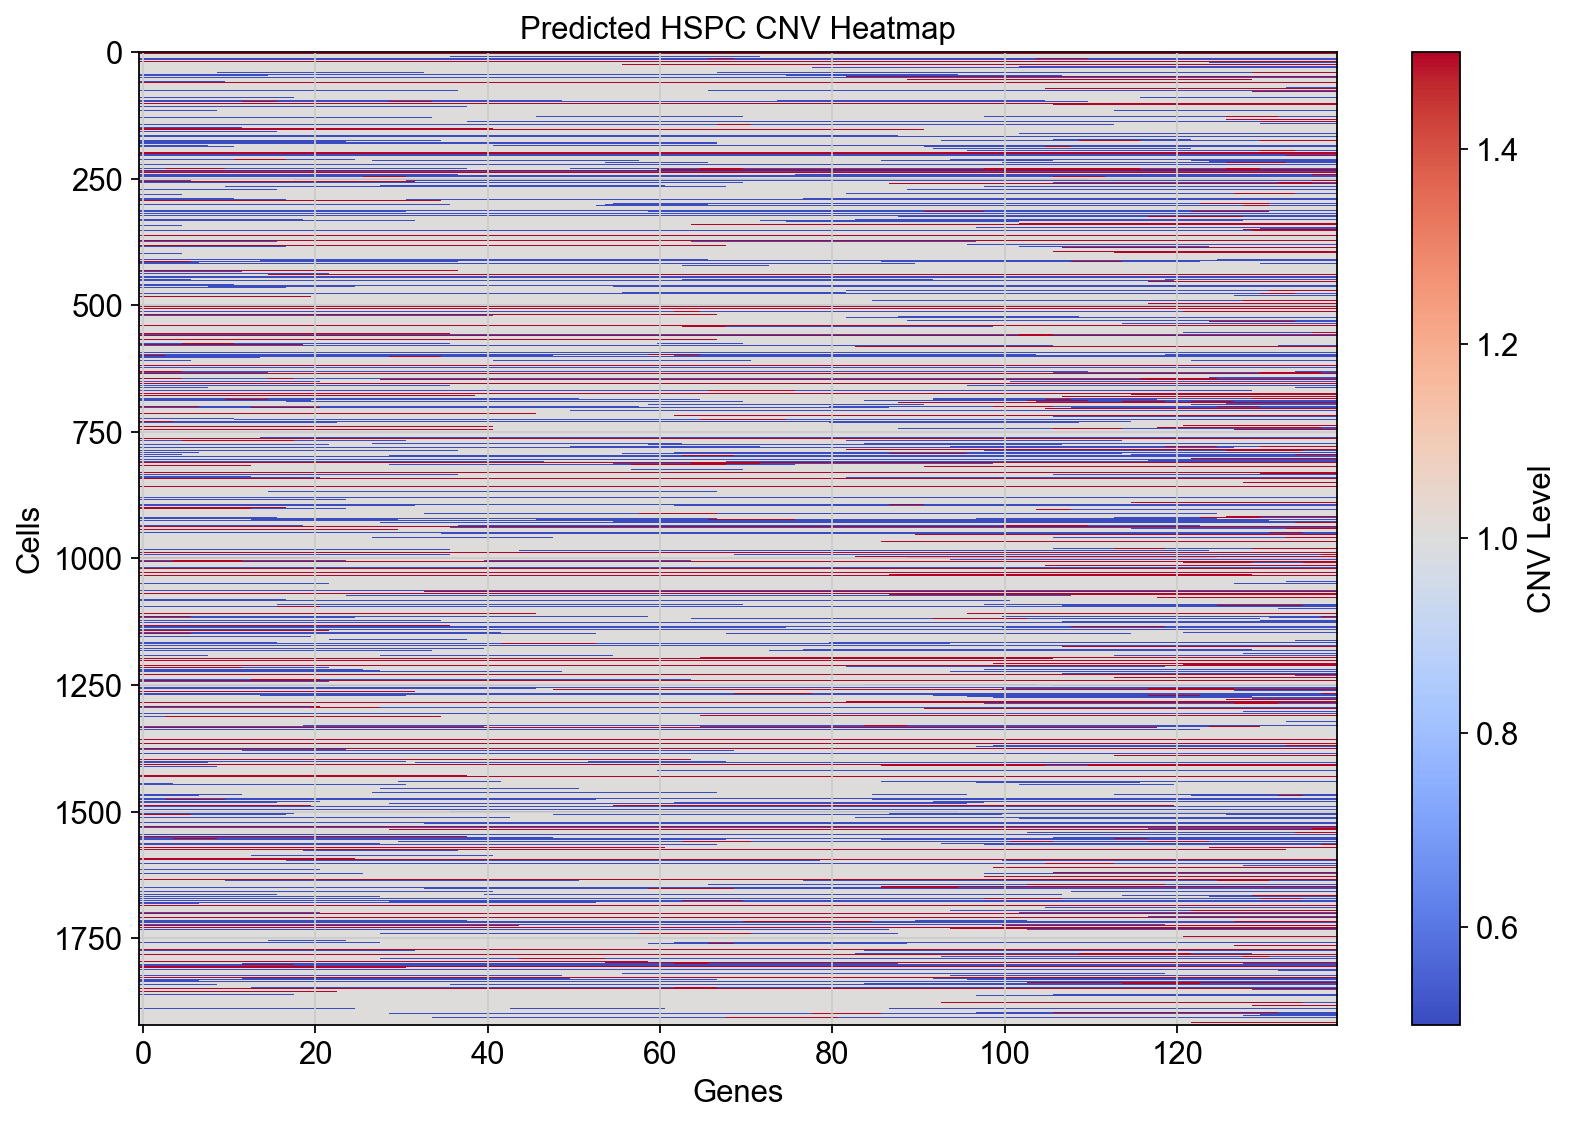

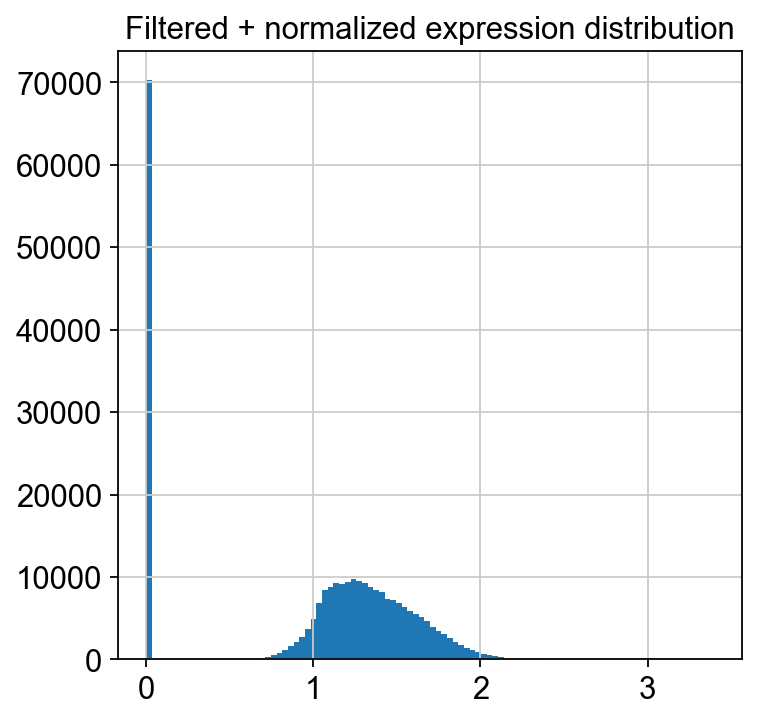

In [18]:
adata_hspc = i3_hmm_infercnv(adata,cell_type='HSPC',cell_annotation='celltype',diploid_annotation='predicted_diploid',logFC_threshold=0.5,plots=True)

In [19]:
adata_hspc.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,n_genes,n_counts,leiden,celltype,predicted_diploid,gmm_cluster,hmm_cnv_score,hmm_cnv
barcode,,,,,,,,,,,,,,
AACACACAGAATCCGGTGACGTGTGTT,631,814,0,0.0,122,12.423625,631,814,1,HSPC,aneuploid,0,1.000000,
AACACACAGAATCCGGTGCCAATACAG,1434,2356,0,0.0,526,17.580214,1434,2356,1,HSPC,aneuploid,2,1.000000,
AACACACAGACCTCGACTTCGCATACT,1821,3216,0,0.0,707,16.954436,1821,3216,1,HSPC,aneuploid,2,1.500000,chr1:8861000.0-244864560.0 (gain)
AACACACAGACCTGCTACTGGTTGTAC,460,532,0,0.0,69,10.222222,460,532,1,HSPC,aneuploid,0,0.500000,chr1:8861000.0-244864560.0 (loss)
AACACACAGACTCATCGTCCTCTTAAG,957,1336,0,0.0,304,17.501439,957,1336,1,HSPC,aneuploid,0,1.000000,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGTGGACACGCTGCGATAATCGCTCTG,1159,1830,0,0.0,384,16.688396,1159,1830,1,HSPC,aneuploid,0,1.061151,chr1:8861000.0-225790468.0 (gain)
TGTGGACACGCTGCGATAGGCCATGTT,1064,1514,0,0.0,328,16.803279,1064,1514,1,HSPC,aneuploid,0,1.000000,
TGTGGACACGGAAGACTCAGGTTGGCT,548,676,0,0.0,151,17.062147,548,676,1,HSPC,aneuploid,0,1.000000,


In [20]:
# Update new CNV information back into original adata
adata.obs.loc[adata_ipsc.obs_names,'hmm_cnv'] = adata_ipsc.obs['hmm_cnv']
adata.obs.loc[adata_hspc.obs_names,'hmm_cnv'] = adata_hspc.obs['hmm_cnv']
adata.obs['hmm_cnv'].fillna('', inplace=True)
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,n_genes,n_counts,leiden,celltype,predicted_diploid,gmm_cluster,hmm_cnv
barcode,,,,,,,,,,,,,
AACACACAGAACGTCCAAACCAATCCG,2180,3938,0,0.0,908,15.910286,2180,3938,0,iPSC,aneuploid,2,
AACACACAGAACGTCCAACTTCAGTCT,2241,4310,0,0.0,905,15.179470,2241,4310,0,iPSC,aneuploid,2,
AACACACAGAACGTCCAAGTACGGACT,2009,3674,0,0.0,805,15.540541,2009,3674,0,iPSC,aneuploid,2,
AACACACAGAATCCGGTGACGTGTGTT,631,814,0,0.0,122,12.423625,631,814,1,HSPC,aneuploid,0,
AACACACAGAATCCGGTGCCAATACAG,1434,2356,0,0.0,526,17.580214,1434,2356,1,HSPC,aneuploid,2,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGTGGACACTTACACGACTGACAGCTA,2311,4142,0,0.0,782,13.630818,2311,4142,0,iPSC,diploid,1,
TGTGGACACTTGCCGTCACCAAGGATG,1920,3219,0,0.0,501,11.076719,1920,3219,0,iPSC,aneuploid,2,
TGTGGACACTTGCCGTCATGCTATCGC,2313,4440,0,0.0,766,12.575932,2313,4440,0,iPSC,aneuploid,2,


In [22]:
# Get top 10 most common CNVs
top_cnvs = adata_hspc.obs['hmm_cnv'].value_counts().head(10)
print("Top 10 most common CNVs:\n")
print(top_cnvs)

print("\nFraction of iPSC vs HSPC cells for each top CNV:\n")

# For each CNV, calculate fraction of iPSC and HSPC cells
for cnv in top_cnvs.index:
    subset = adata.obs[adata.obs['hmm_cnv'] == cnv]
    total = len(subset)

    ipsc_count = (subset['celltype'] == 'iPSC').sum()
    hspc_count = (subset['celltype'] == 'HSPC').sum()

    ipsc_frac = ipsc_count / total if total else 0
    hspc_frac = hspc_count / total if total else 0

    print(f"{cnv}:")
    print(f"  iPSC: {ipsc_count} cells ({ipsc_frac:.2%})")
    print(f"  HSPC: {hspc_count} cells ({hspc_frac:.2%})\n")


Top 10 most common CNVs:

hmm_cnv
                                      1011
chr1:8861000.0-244864560.0 (loss)      295
chr1:8861000.0-244864560.0 (gain)      184
chr21:39342315.0-39349647.0 (loss)     116
chr21:39342315.0-39349647.0 (gain)     114
chr1:8861000.0-225790468.0 (loss)       19
chr1:8861000.0-205750182.0 (loss)       19
chr1:8861000.0-226408154.0 (loss)       19
chr1:8861000.0-173488815.0 (loss)       18
chr1:8861000.0-62235060.0 (loss)        13
Name: count, dtype: int64

Fraction of iPSC vs HSPC cells for each top CNV:

:
  iPSC: 6999 cells (82.55%)
  HSPC: 1480 cells (17.45%)

chr1:8861000.0-244864560.0 (loss):
  iPSC: 0 cells (0.00%)
  HSPC: 295 cells (100.00%)

chr1:8861000.0-244864560.0 (gain):
  iPSC: 0 cells (0.00%)
  HSPC: 184 cells (100.00%)

chr21:39342315.0-39349647.0 (loss):
  iPSC: 0 cells (0.00%)
  HSPC: 116 cells (100.00%)

chr21:39342315.0-39349647.0 (gain):
  iPSC: 0 cells (0.00%)
  HSPC: 114 cells (100.00%)

chr1:8861000.0-225790468.0 (loss):
  iPSC: 0 c

In [ ]:
adata.obs["hmm_cnv"].astype(bool).sum()

In [ ]:
# Because chromosome location and genomic regions are almost all wrong
# We will focus on whether we were able to detect in a cell a CNV and its type (gain or loss) correctly
assess_predicted_cnvs(adata,prediction_annotation='hmm_cnv',truth_annotation='simulated_cnvs')